In [18]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score



In [19]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [23]:
#use train/test split with different random_state values
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 4)

# check classification accuracy of KNN with K = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain,ytrain)
y_pred = knn.predict(Xtest)

print(metrics.accuracy_score(ytest,y_pred))

0.9736842105263158


In [27]:


# check classification accuracy of KNN with K = 5
knn = KNeighborsClassifier(n_neighbors = 5)

#this will perform upto the 4 steps of k-fold cross validation for each validation and the accuracies are stored in 
#numpy array for each corresponding fold ,the size of each fold is 10
scores = cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy')

print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [29]:
#Performing the 5th step
print(scores.mean())

0.9666666666666668


## Searching an optimal value of for KNN

In [34]:
# 10-fold cross-validation with K = 5 for KNN(the n_neighbors parameter)
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy') #upto 4 steps of each 10-fold
    
    k_scores.append(scores.mean()) # 5th step
print(k_scores)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


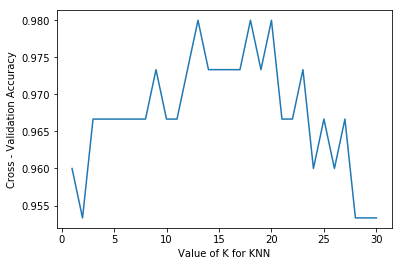

In [39]:
import matplotlib.pyplot as plt

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross - Validation Accuracy')

plt.show()

#### So best value is the middle value let say 20

## Comparing the best KNN model and the logistic regression model

### training with the best n_neighbors value i.e, 20 with 10-fold cross validation for KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=20)

print(cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy').mean())

0.9800000000000001


In [43]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

print(cross_val_score(logReg,X,y,cv = 10,scoring = 'accuracy').mean())

0.9533333333333334


#### So for this data KNN with K = 10 is the best